# Model Building and Evaluation

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, \
    roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import train_test_split
data = pd.read_csv('https://drive.google.com/uc?export=download&id=16ghp-aZP7kq-zQmdm1mMWY74BqshFs6T')


In [4]:
data['y'].value_counts()

0.0    945
1.0     55
Name: y, dtype: int64

In [5]:
y = data['y'].values
X = data.drop('y', axis=1).values

In [7]:
n, p = X.shape
print(n, p)

1000 20


In [8]:
y.mean()

0.055

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=1) # random_state=1 as seed

In [10]:
lr=LogisticRegression(penalty='none')
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
lr.coef_

array([[ 9.61345015e-01, -1.98543964e-01, -5.09540856e-01,
         8.80949864e-01,  6.79168206e-04, -2.25901299e-01,
         1.20767744e-01, -3.00241012e-01,  2.93607305e-02,
        -6.45053149e-01,  3.84441372e-01,  2.24146374e-02,
         2.22668461e+00, -4.43236119e-02, -4.91321574e-01,
         2.07235074e-02, -1.76348714e-01, -2.09414180e-01,
        -2.19431589e-01,  5.90802192e-02]])

In [13]:
preds=lr.predict(X_test) #prediction
probs=lr.predict_proba(X_test)[:, 1].round(2)

In [29]:
print('Accuracy: ', lr.score(X_test, y_test))
print(accuracy_score(y_test, preds))


tn, fp, fn, tp = conf_mat.ravel()
print('Recall: ', recall_score(y_test, preds))
print('Precision: ', precision_score(y_test, preds))
print('FPR: ', fp / (fp + tn))
print('FDR: ', fp / (fp + tp))

Accuracy:  0.97
0.97
Recall:  0.5294117647058824
Precision:  0.9
FPR:  0.0035335689045936395
FDR:  0.1
282


In [30]:
print(tn)

282


In [31]:
print(fp)

1


In [32]:
print(fn)

8


In [33]:
print(tp)

9


In [36]:
tp/(tp+fn) # Recall

0.9066666666666666

AUC:  0.8803782997297859


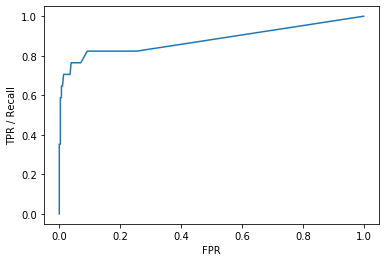

In [15]:
fpr, tpr, thresh = roc_curve(y_test, probs)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR / Recall')
print('AUC: ', roc_auc_score(y_test, probs))

In [34]:
# confusion_matrix
conf_mat = confusion_matrix(y_test, preds)
print(conf_mat)

[[282   8]
 [  1   9]]


In [35]:
#recall
tp/(tp+fn)

0.5294117647058824

In [26]:
print('FPR: ', fp / (fp + tn))
print('FDR: ', fp / (fp + tp))

FPR:  0.0035335689045936395
FDR:  0.1


Text(0, 0.5, 'Precision')

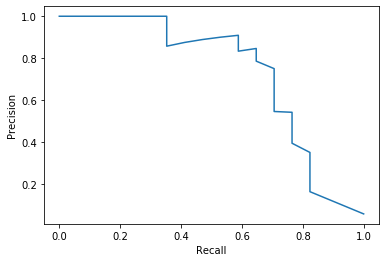

In [21]:
precision, recall, thresh = precision_recall_curve(y_test, probs)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')

In [15]:
def kernel(x1, x2):
    distance = np.linalg.norm(x1-x2, 0.1)
    return np.exp(-2 * distance)
kernel(a, b)

0.0

In [13]:
a= np.array([-1.0, 1.5, 3.2, -0.7]) 
b= np.array([1.4, 1.5, -1.8, 0.7])